In [27]:
#Gridscearchcv is the powerful method to find optimal set of hyperparameter for the model(estimator).HP=value set before the learning process begins.
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dataset=pd.read_csv("insurance_pre.csv")
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [29]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [30]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [31]:
indep=dataset[['age','bmi','children','sex_male','smoker_yes']]
indep

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [32]:
dep=dataset[['charges']]
dep

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


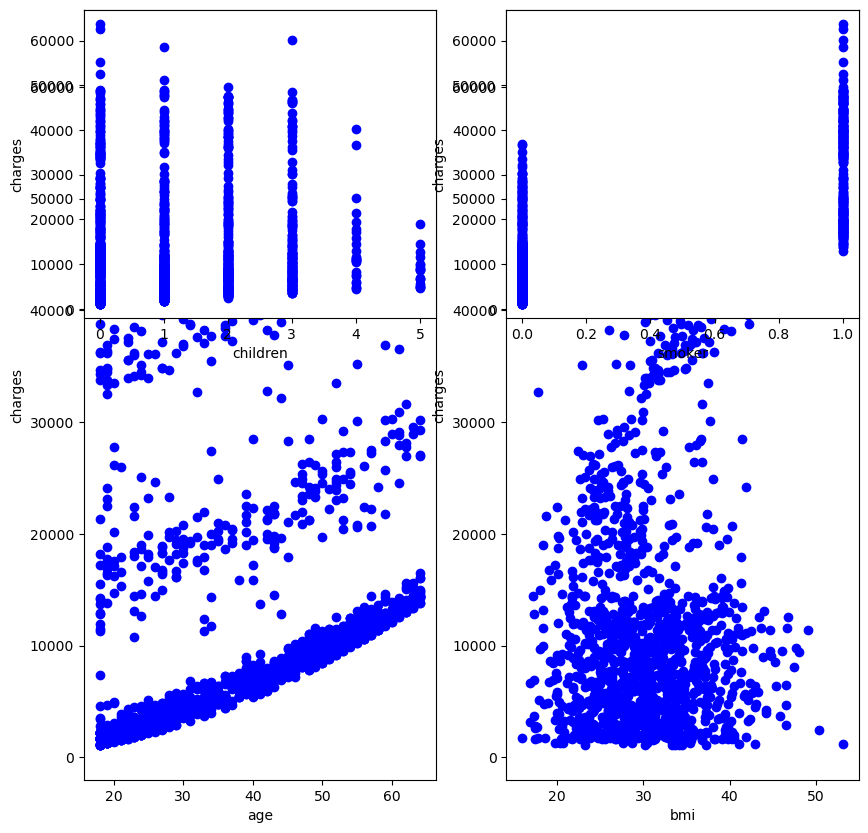

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(dataset['age'],dataset['charges'],marker='o',color='blue')
plt.xlabel('age')
plt.ylabel('charges')

plt.subplot(1,2,2)
plt.scatter(dataset['bmi'],dataset['charges'],marker='o',color='blue')
plt.xlabel('bmi')
plt.ylabel('charges')

plt.subplot(2,2,1)
plt.scatter(dataset['children'],dataset['charges'],marker='o',color='blue')
plt.xlabel('children')
plt.ylabel('charges')

plt.subplot(2,2,2)
plt.scatter(dataset['smoker_yes'],dataset['charges'],marker='o',color='blue')
plt.xlabel('smoker')
plt.ylabel('charges')
#plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
#In grid search no need for splitting train and test set ..beacause it inherently does the cross validation
from sklearn.svm import SVR #instead of SVR linearSVR makes it faster
from sklearn.model_selection import GridSearchCV
param_grid={'kernel':['poly','linear','rbf'],
            'C':[10,1000,3000],
            'gamma':['auto','scale']} 
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3,n_jobs=-1,cv=3)#cv 3 indicates crossvalidation iterartion 3 times instead of default 5
grid.fit(indep,dep)


In [19]:
grid.best_params_


{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}

In [20]:
grid.best_score_

np.float64(0.8230401432122791)

In [22]:
result=grid.cv_results_
table=pd.DataFrame.from_dict(result)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3800.961718,719.014344,0.023922,0.008618,10,auto,poly,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.841561,0.835473,0.792087,0.823040,0.022028,1
1,0.193412,0.038249,0.026865,0.000527,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",-0.029744,0.024305,-0.087219,-0.030886,0.045536,8
2,0.146856,0.020951,0.111750,0.007065,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",-0.121859,-0.071812,-0.115978,-0.103216,0.022336,12
3,0.095157,0.006023,0.027843,0.001215,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",-0.117169,-0.084321,-0.180189,-0.127226,0.039778,14
4,0.102476,0.006751,0.026486,0.000791,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",-0.029744,0.024305,-0.087219,-0.030886,0.045536,8
5,0.099673,0.005510,0.105717,0.006372,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",-0.120647,-0.062407,-0.126932,-0.103329,0.029050,13
6,4202.860751,745.329494,0.017718,0.006335,1000,auto,poly,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly'}",-33.573194,-7.258326,-14.434043,-18.421854,11.106906,17
7,0.721463,0.109251,0.030020,0.008601,1000,auto,linear,"{'C': 1000, 'gamma': 'auto', 'kernel': 'linear'}",0.674923,0.673021,0.642308,0.663417,0.014947,4
8,0.216977,0.052216,0.144581,0.036368,1000,auto,rbf,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}",-0.090261,-0.036964,-0.131036,-0.086087,0.038518,10
9,0.203155,0.008114,0.047731,0.001616,1000,scale,poly,"{'C': 1000, 'gamma': 'scale', 'kernel': 'poly'}",-0.074574,-0.057414,-0.149167,-0.093719,0.039829,11


In [23]:
final_pred=grid.predict([[19,0,27.900,0,1]])
print(f"After SVR gridSearch prediction is {final_pred}")

After SVR gridSearch prediction is [22290.23514824]


C:\Users\huawei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
